# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Hierarchical Clustering for Deduplication

**Steps**:
1. Data Set: Obtain a dataset containing duplicate employee information.
2. Perform Clustering: Use hierarchical agglomerative clustering to cluster the employee
records.
3. Evaluate Duplicates: Determine duplicates by analyzing the clusters formed.
4. Clean Data: Remove duplicate employee records found during clustering.

In [ ]:
# write your code from here


Generating sample employee dataset...

Original Data:
       Name             Email  Phone
0    Alice    alice@work.com  12345
1      Bob      bob@work.com  23456
2  Charlie  charlie@work.com  34567
3    Alice    alice@work.com  12345
4    David    david@work.com  45678
5  Charlie  charlie@work.com  34567
6      Eve      eve@work.com  56789
7    Frank    frank@work.com  67890
8      Eve      eve@work.com  56789
9   George   george@work.com  78901

Preprocessing data...

Clustering records...

Identifying duplicates and cleaning data...

Final Deduplicated Data:
       Name             Email  Phone
0      Eve      eve@work.com  56789
1  Charlie  charlie@work.com  34567
2    Alice    alice@work.com  12345
3    David    david@work.com  45678
4   George   george@work.com  78901
5      Bob      bob@work.com  23456
6    Frank    frank@work.com  67890

Plotting dendrogram for reference...


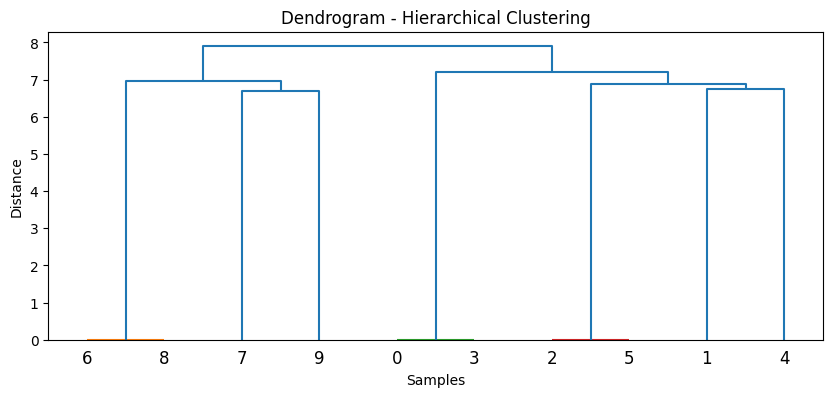

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Step 1: Simulate employee dataset with duplicates
def generate_employee_data():
    return pd.DataFrame({
        'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'David', 'Charlie', 'Eve', 'Frank', 'Eve', 'George'],
        'Email': [
            'alice@work.com', 'bob@work.com', 'charlie@work.com', 'alice@work.com',
            'david@work.com', 'charlie@work.com', 'eve@work.com', 'frank@work.com',
            'eve@work.com', 'george@work.com'
        ],
        'Phone': ['12345', '23456', '34567', '12345', '45678', '34567', '56789', '67890', '56789', '78901']
    })

# Step 2: Preprocess data
def preprocess_data(df):
    try:
        df_clean = df.copy()
        df_clean['Phone'] = pd.to_numeric(df_clean['Phone'], errors='coerce')
        df_clean.dropna(inplace=True)
        encoded_df = pd.get_dummies(df_clean[['Name', 'Email']])
        features = pd.concat([encoded_df, df_clean[['Phone']]], axis=1)
        scaled = StandardScaler().fit_transform(features)
        return df_clean.reset_index(drop=True), scaled
    except Exception as e:
        raise ValueError(f"Preprocessing failed: {e}")

# Step 3: Perform Agglomerative Clustering
def perform_clustering(data, distance_threshold=1.5):
    try:
        model = AgglomerativeClustering(
            n_clusters=None,
            distance_threshold=distance_threshold,
            linkage='ward'
        )
        labels = model.fit_predict(data)
        return labels
    except Exception as e:
        raise ValueError(f"Clustering failed: {e}")

# Step 4: Deduplicate based on clusters
def deduplicate_by_cluster(df, labels):
    try:
        df['Cluster'] = labels
        deduplicated = df.groupby('Cluster').first().reset_index()
        return deduplicated.drop(columns=['Cluster'])
    except Exception as e:
        raise ValueError(f"Deduplication failed: {e}")

# Optional: Visualize dendrogram
def plot_dendrogram(data):
    try:
        Z = linkage(data, method='ward')
        plt.figure(figsize=(10, 4))
        dendrogram(Z)
        plt.title("Dendrogram - Hierarchical Clustering")
        plt.xlabel("Samples")
        plt.ylabel("Distance")
        plt.show()
    except Exception as e:
        print(f"Failed to plot dendrogram: {e}")

# Main workflow
def main():
    print("Generating sample employee dataset...\n")
    df = generate_employee_data()
    print("Original Data:\n", df)

    print("\nPreprocessing data...")
    df_clean, processed_data = preprocess_data(df)

    print("\nClustering records...")
    labels = perform_clustering(processed_data, distance_threshold=1.5)

    print("\nIdentifying duplicates and cleaning data...")
    deduplicated_df = deduplicate_by_cluster(df_clean, labels)

    print("\nFinal Deduplicated Data:\n", deduplicated_df)

    print("\nPlotting dendrogram for reference...")
    plot_dendrogram(processed_data)

# Run
main()
